<a href="https://colab.research.google.com/github/Madhusudhanbandi/EVA-S15/blob/master/EVA_S15_ASSIG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
import sys
sys.path.append('/content/gdrive/My Drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%cd '/content/gdrive/My Drive/Colab Notebooks/S14/DenseDepth'


/content/gdrive/My Drive/Colab Notebooks/S14/DenseDepth


In [0]:
!pip install pytorch-msssim

In [0]:
%matplotlib inline

In [0]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import torchvision
from torchsummary import summary
from model_a15 import *
from utils_a15 import *
from training_a15 import * 
from tqdm import tqdm

import numpy as np
import PIL.Image as Image
from tqdm import tqdm
from torch.utils import data
from PIL import Image
import zipfile
from zipfile import ZipFile
import glob



from albumentations import  ( 
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, RandomBrightnessContrast, Flip, OneOf, Compose , Normalize ,ToFloat, Cutout
)

import cv2

import numpy as np

from albumentations.pytorch import  ToTensor 



In [0]:
file_name='/content/gdrive/My Drive/Colab Notebooks/S14/DenseDepth/bgfg_images.zip'
file_name_mask='/content/gdrive/My Drive/Colab Notebooks/S14/DenseDepth/fgmask_images.zip'
file_name_depth='/content/gdrive/My Drive/Colab Notebooks/S14/DenseDepth/depthimages.zip'
file_name_bg='/content/gdrive/My Drive/Colab Notebooks/S14/DenseDepth/background/'

images_bgfg=make_dataset_bgfg(file_name,rndlist)

images_mask=make_dataset_mask(file_name_mask,rndlist)

images_depth=make_dataset_depth(file_name_depth,rndlist)


Required BGFG images loaded
Required MASK images loaded
Required DEPTH images loaded


**Dataset creation and applying transforms**

In [0]:
traindata = Image_Dataset(file_name,file_name_mask,file_name_depth,rndlist,is_transform=True)

Required BGFG images loaded
Required MASK images loaded
Required DEPTH images loaded


In [0]:
trainloader=Dataloader(traindata,32)

CUDA Available? True
Train data loaded.......


**Loading model**

In [0]:
Net =modelup()
from torchsummary import summary
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net()
model = model.to(device)

summary(model, input_size=(6, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           3,456
       BatchNorm2d-2         [-1, 64, 224, 224]             128
              ReLU-3         [-1, 64, 224, 224]               0
         MaxPool2d-4         [-1, 64, 112, 112]               0
            Conv2d-5        [-1, 128, 112, 112]          73,728
       BatchNorm2d-6        [-1, 128, 112, 112]             256
              ReLU-7        [-1, 128, 112, 112]               0
         MaxPool2d-8          [-1, 128, 56, 56]               0
            Conv2d-9          [-1, 256, 56, 56]         294,912
      BatchNorm2d-10          [-1, 256, 56, 56]             512
             ReLU-11          [-1, 256, 56, 56]               0
        MaxPool2d-12          [-1, 256, 28, 28]               0
           Conv2d-13          [-1, 512, 28, 28]       1,179,648
      BatchNorm2d-14          [-1, 512,

In [0]:
#Binary Cross Entropy
criterion = nn.BCELoss(reduction='mean')
cos = nn.CosineSimilarity(dim=0, eps=1e-6)

from pytorch_msssim import ssim

In [0]:
import warnings
warnings.filterwarnings("ignore")

train_losses = []
train_acces = []
train_accesd = []


optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9,nesterov=True,weight_decay=0)

import time
start = time.process_time()

EPOCHS = 30
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    pred_images,pred_images_dep,train_losses,train_acces,train_accesd=train(model, device, trainloader, optimizer,epoch,EPOCHS,criterion,cos)

print(time.process_time() - start)

EPOCH: 0

Train Average BCE loss: 0.0677

Train Average SSIM Accuracy for mask images: 0.0302

Train Average SSIM Accuracy for depth images: 0.0310
EPOCH: 1

Train Average BCE loss: 0.0657

Train Average SSIM Accuracy for mask images: 0.0303

Train Average SSIM Accuracy for depth images: 0.0310
EPOCH: 2

Train Average BCE loss: 0.0643

Train Average SSIM Accuracy for mask images: 0.0303

Train Average SSIM Accuracy for depth images: 0.0310
EPOCH: 3

Train Average BCE loss: 0.0635

Train Average SSIM Accuracy for mask images: 0.0304

Train Average SSIM Accuracy for depth images: 0.0310
EPOCH: 4

Train Average BCE loss: 0.0628

Train Average SSIM Accuracy for mask images: 0.0304

Train Average SSIM Accuracy for depth images: 0.0310
EPOCH: 5

Train Average BCE loss: 0.0621

Train Average SSIM Accuracy for mask images: 0.0304

Train Average SSIM Accuracy for depth images: 0.0310
EPOCH: 6

Train Average BCE loss: 0.0612

Train Average SSIM Accuracy for mask images: 0.0304

Train Average SSI

1) Real Mask images



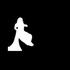
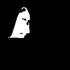
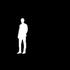
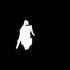
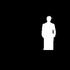
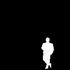
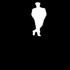
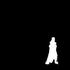
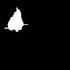
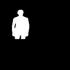

2) BGFG images



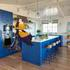
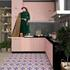
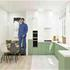
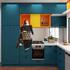
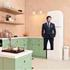
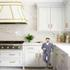
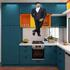
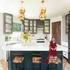
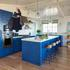
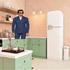

3) Depth images



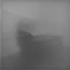
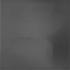
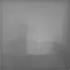
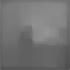
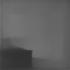
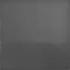
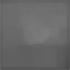
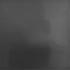
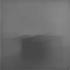
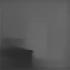

In [0]:
import numpy as np
import PIL.Image as Image
from tqdm import tqdm
from torch.utils import data
from PIL import Image
import zipfile
from zipfile import ZipFile
from IPython.display import display
from IPython.display import HTML
from PIL import Image
from io import BytesIO
import glob
import random
import base64
import pandas as pd
import cv2


def get_thumbnail(img):
  i = Image.open(img)
  i.thumbnail((70, 70), Image.LANCZOS)
  return i

 
def get_thumbnail_from_image(img):
  i = img.copy()
  i.thumbnail((70, 70), Image.LANCZOS)
  return i

def image_base64(im):
  if isinstance(im, str):
    im = get_thumbnail(im)
  with BytesIO() as buffer:
    im.save(buffer, 'jpeg')
    return base64.b64encode(buffer.getvalue()).decode()

def image_formatter(im):
  return f'<img style="display:inline;margin:1px" src="data:image/jpeg;base64,{image_base64(im)}">'
  
def preview_images(imglis):
  images = list(map(lambda x:image_formatter(get_thumbnails(x)), imglis))
  display(HTML(''.join(images)))

def preview_images1(imglis):
  images = list(map(lambda x:image_formatter(get_thumbnail(zip.open(x))), imglis))
  display(HTML(''.join(images)))


images_bgfg10=images_bgfg[0:10]
images_mask10=images_mask[0:10]
images_depth10=images_depth[0:10]
print("1) Real Mask images")
with ZipFile(file_name_mask, 'r') as zip:
  image_files=zip.namelist()
  preview_images1(images_mask10)
print("2) BGFG images")
with ZipFile(file_name, 'r') as zip:
  image_files=zip.namelist()
  preview_images1(images_bgfg10)
print("3) Depth images")
with ZipFile(file_name_depth, 'r') as zip:
  image_files=zip.namelist()
  preview_images1(images_depth10)


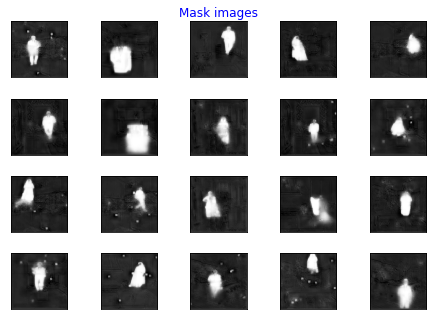

In [0]:

imgs=pred_images.cpu().detach().numpy()

import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle('Mask images',y=1.05,fontsize=12,color='b')
for i in range(20):
  plt.subplot(4,5,i+1).set_aspect('equal')
  plt.tight_layout()
  plt.imshow(imgs[i], cmap='gray', interpolation='none')
  plt.xticks([])
  plt.yticks([])

  plt.subplots_adjust(wspace=None, hspace=None, left=0, right=1, bottom=0, top=1)
plt.show()

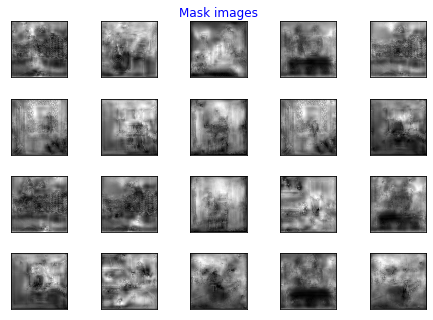

In [0]:

imgs=pred_images_dep.cpu().detach().numpy()

import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle('Mask images',y=1.05,fontsize=12,color='b')
for i in range(20):
  plt.subplot(4,5,i+1).set_aspect('equal')
  plt.tight_layout()
  plt.imshow(imgs[i], cmap='gray', interpolation='none')
  plt.xticks([])
  plt.yticks([])

  plt.subplots_adjust(wspace=None, hspace=None, left=0, right=1, bottom=0, top=1)
plt.show()